<PIL.Image.Image image mode=L size=1024x1024 at 0x1FC87A6F3D0>


c:\Users\draar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 1024, 1024, 8)  │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1024, 1024, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 1020, 1020, 8)  │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1020, 1020, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1016, 1016, 8)  │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1016, 1016, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 1012, 1012, 8)  │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 1012, 1012, 8)  │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,904 (19.16 KB)

 Trainable params: 4,904 (19.16 KB)

 Non-trainable params: 0 (0.00 B)

None
[[102 179  92 ... 152 193   9]
 [ 55  29 241 ...  71 241  58]
 [214 220  81 ...  89  88  93]
 ...
 [210 169  79 ... 143  26  82]
 [  5  28  56 ... 139 198  33]
 [148 187 222 ...  63 171 155]]


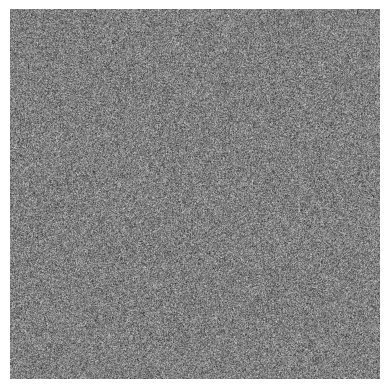

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

def grayscale_and_pad(image_path):
    original_image = Image.open(image_path)
    grayscale_image = original_image.convert('L')
    target_width, target_height = 1024, 1024
    pad_width = (target_width - grayscale_image.width) // 2
    pad_height = (target_height - grayscale_image.height) // 2
    padded_image = Image.new('L', (target_width, target_height), color='white')
    padded_image.paste(grayscale_image, (pad_width, pad_height))

    return padded_image

input_image_path = 'image.png'
output_image = grayscale_and_pad(input_image_path)
print(output_image)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding="same", input_shape=(1024, 1024, 1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(8, (5,5), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(8, (5,5), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(8, (5,5), activation='relu'),
    tf.keras.layers.Dropout(0.1),
])

print(model.summary())


np.random.seed(42)

width, height = 1024, 1024

random_noise = np.random.randint(0, 256, (height, width))

plt.imshow(random_noise, cmap='gray')
plt.axis('off')
plt.show()
